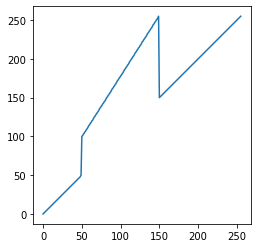

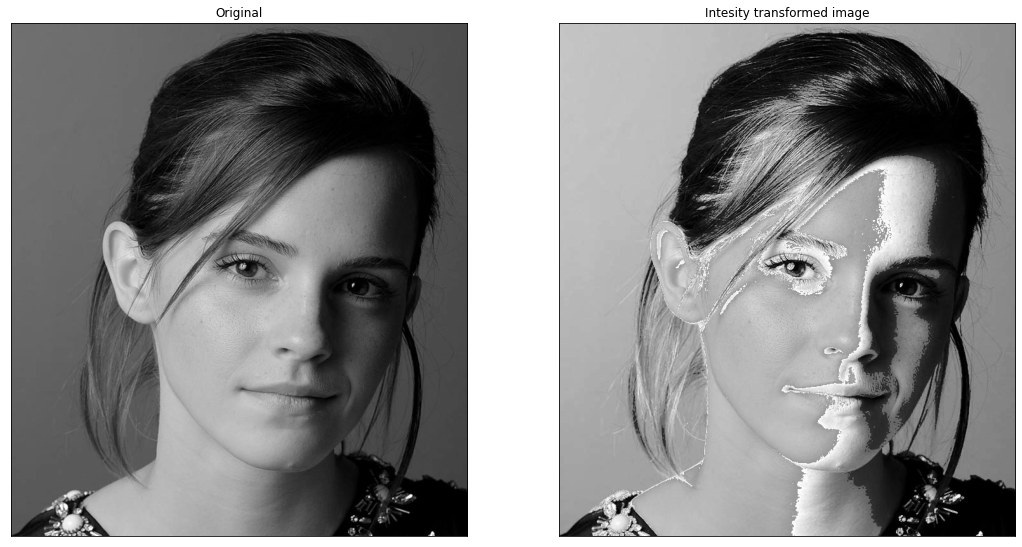

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert im is not None

t1= np.linspace (0,50,50)
t2= np.linspace (50,100,0)
t3= np.linspace (100,255, 100)
t4=np.linspace(255,150,0)
t5=np.linspace(150,255,106)

t= np.concatenate((t1,t2,t3,t4,t5), axis =0).astype(np.uint8)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) ==256

result= cv.LUT(im,t)

fig,axes = plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "Intesity transformed image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()


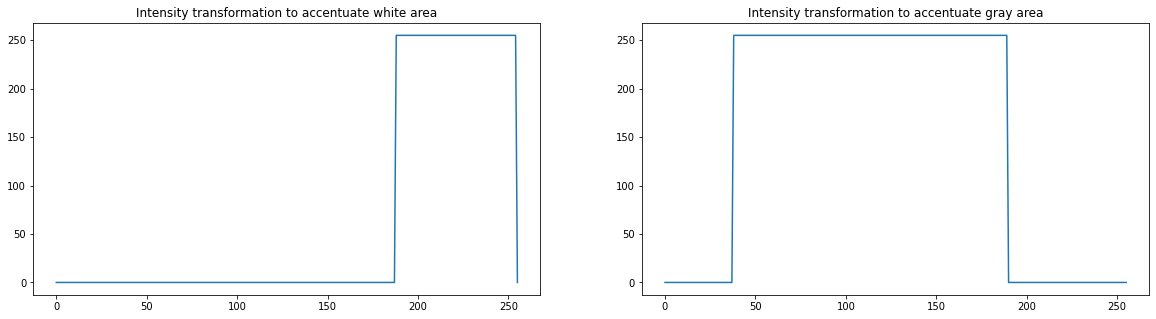

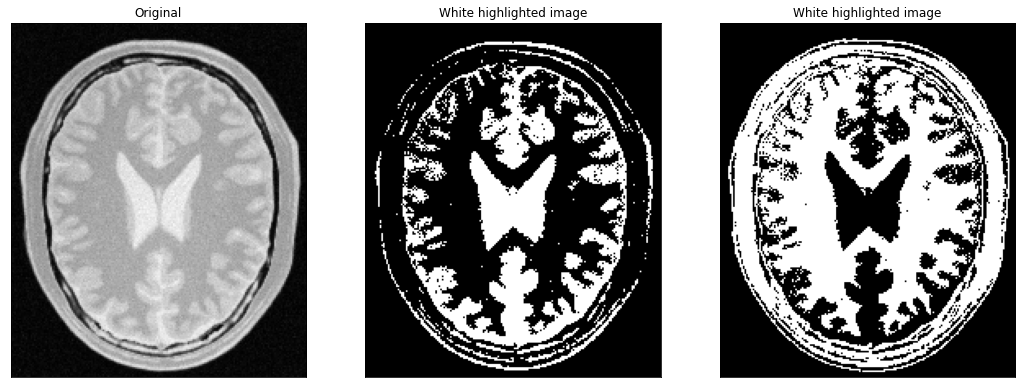

In [75]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert im is not None

# t1=np.linspace(0,0,209)
# t2=np.linspace(255,256,47) #white only

t1=np.linspace(0,0,188)
t2=np.linspace(255,256,68) #white and light gray both

t3=np.linspace(0,0,38)
t4=np.linspace(255,256,153)
t5=np.linspace(0,0,65)

# t1= np.linspace (0,30,30)
# t2= np.linspace (30,100,0)
# t3= np.linspace (100,255, 120)
# t4=np.linspace(255,150,0)
# t5=np.linspace(150,255,106)
t_gray=np.concatenate((t3,t4,t5), axis =0).astype(np.uint8)
t_white= np.concatenate((t1,t2), axis =0).astype(np.uint8)
fig,axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(t_white)
axs[0].set_title("Intensity transformation to accentuate white area")

axs[1].plot(t_gray)
axs[1].set_title("Intensity transformation to accentuate gray area")

#axs.set_aspect('equal')
assert len(t_white) ==256
assert len(t_gray) ==256

white_result= cv.LUT(im,t_white)
gray_result= cv.LUT(im,t_gray)

fig,axes = plt.subplots(1,3,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( white_result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "White highlighted image" )

axes [2] . imshow( gray_result , cmap= "gray",vmin=0, vmax=255)
axes [2] . set_title( "White highlighted image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()

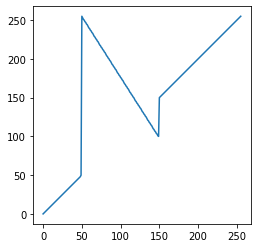

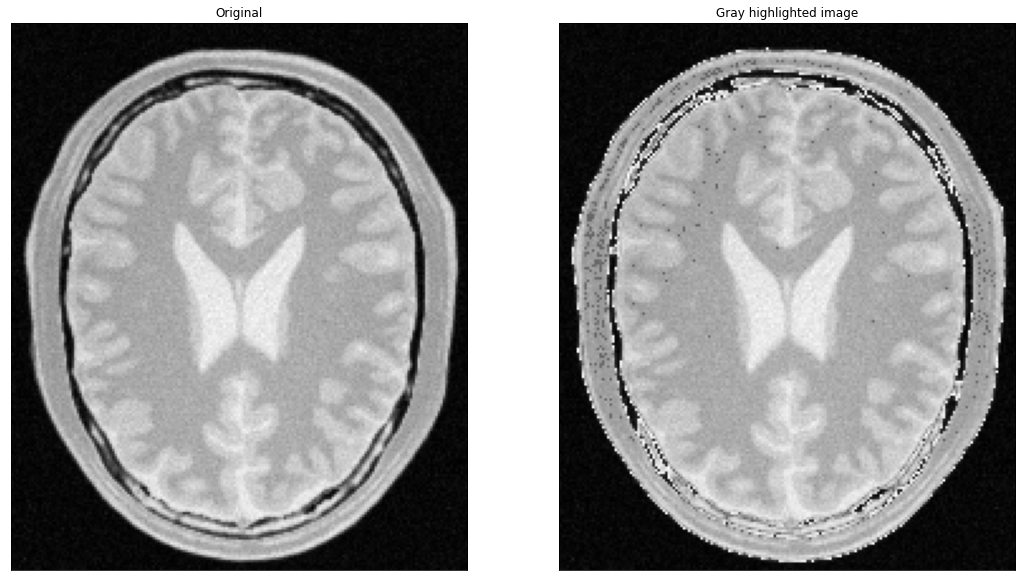

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert im is not None


t1= np.linspace (0,50,50)
t2= np.linspace (50,255,0)
t3= np.linspace (255,100, 100)
t4=np.linspace(100,150,0)
t5=np.linspace(150,255,106)

t= np.concatenate((t1,t2,t3,t4,t5), axis =0).astype(np.uint8)
fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) ==256

result= cv.LUT(im,t)
fig,axes = plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "Gray highlighted image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()

C:\Users\Devindi\AppData\Local\Temp\ipykernel_9388\2871121585.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(20,5))


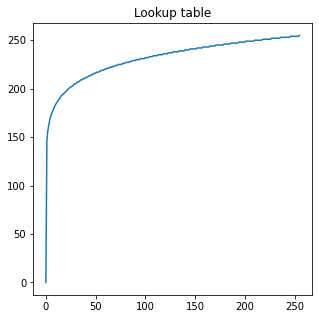

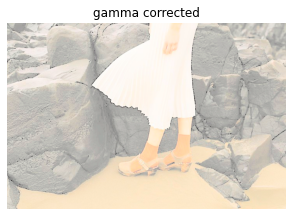

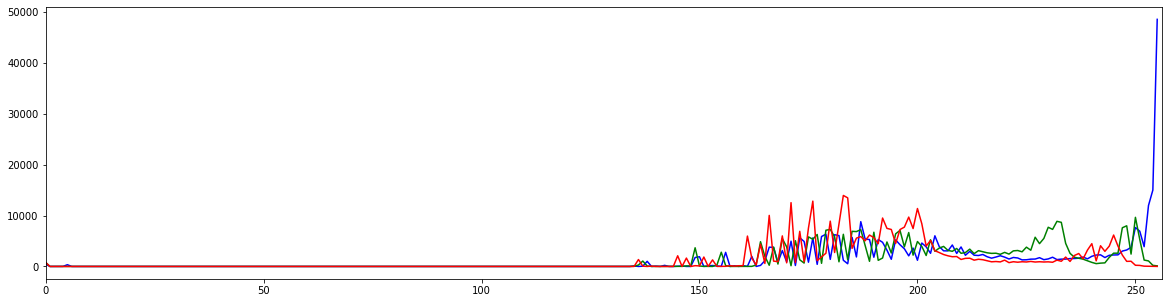

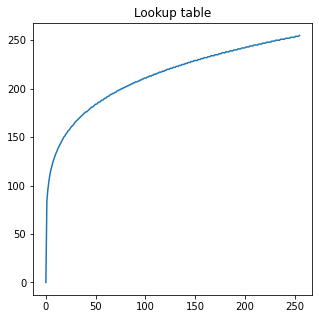

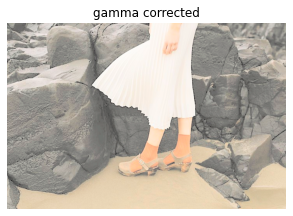

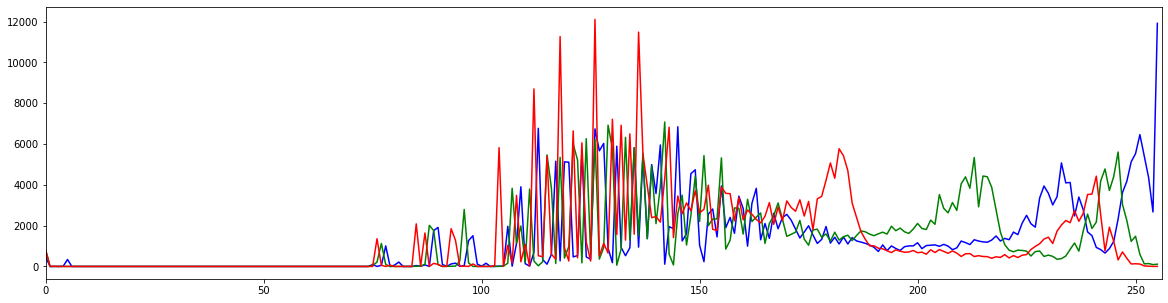

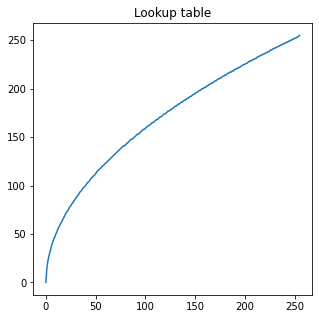

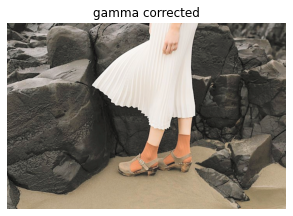

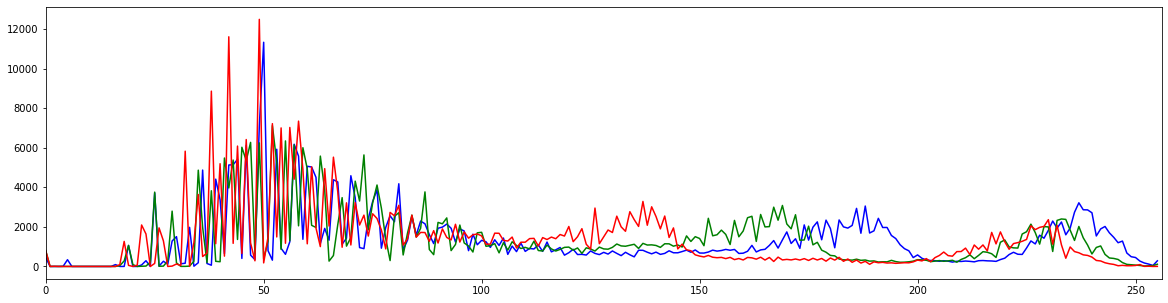

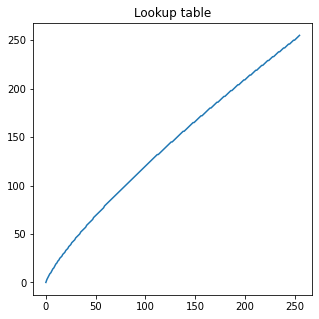

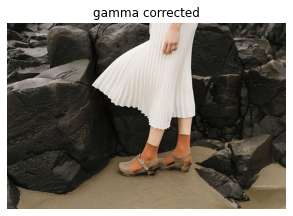

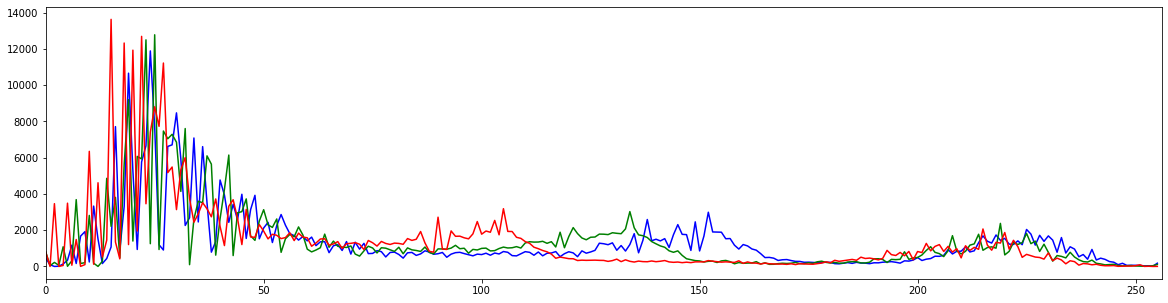

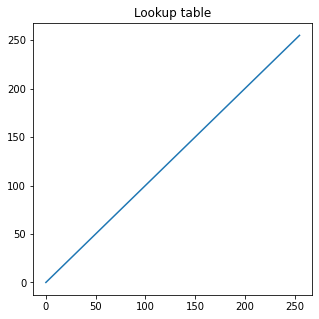

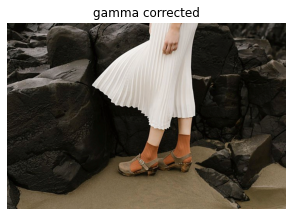

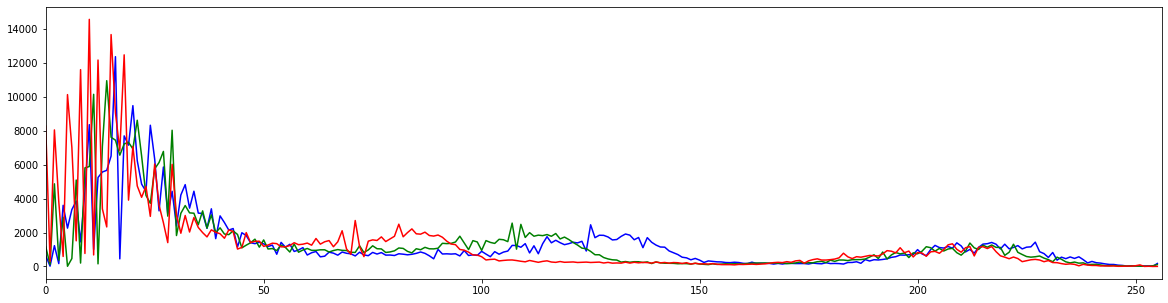

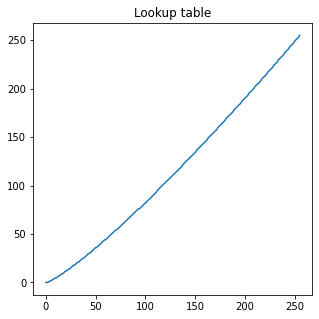

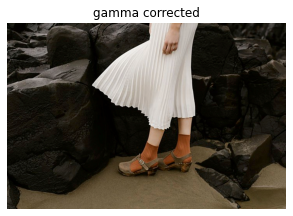

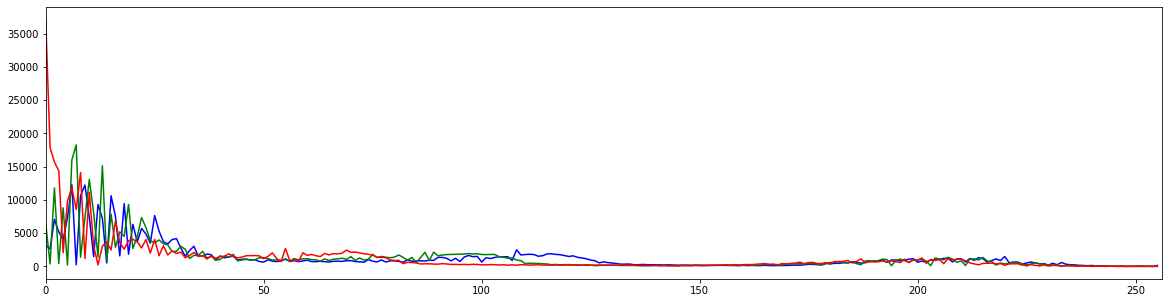

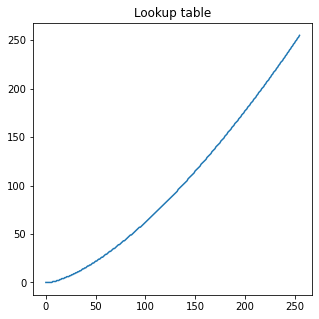

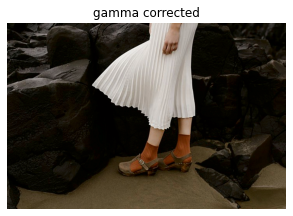

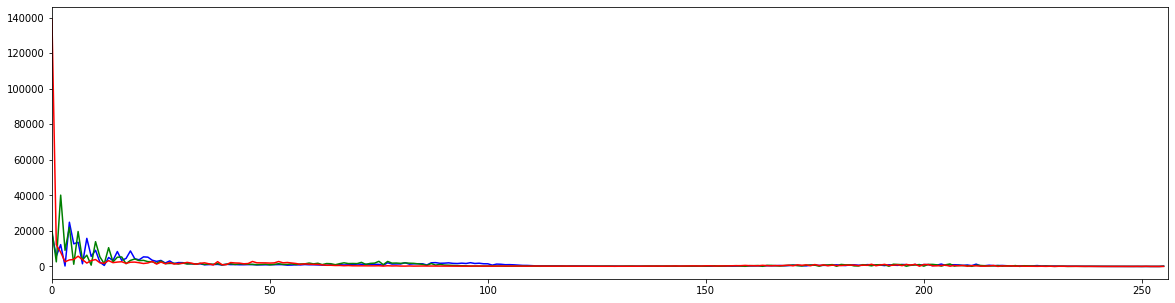

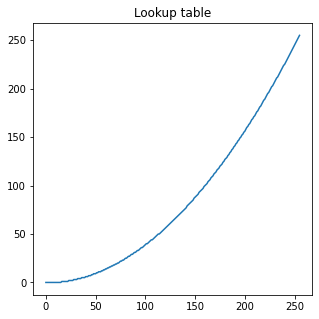

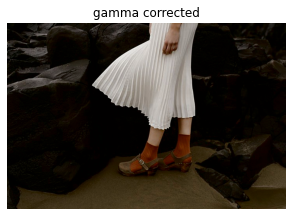

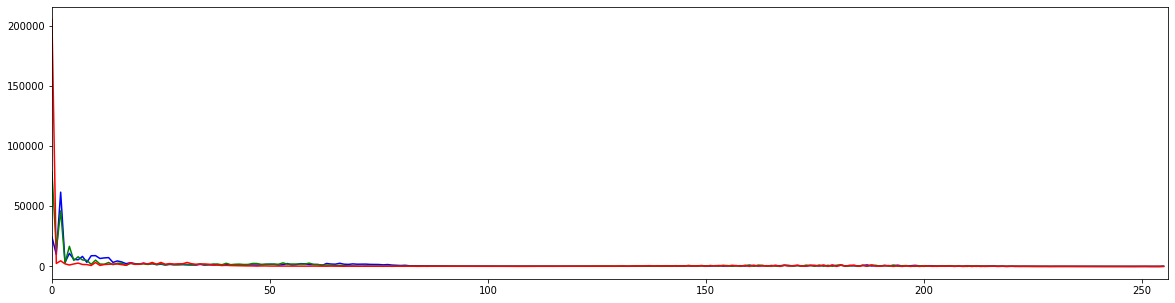

In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'highlights_and_shadows.jpg')
assert im is not None
    
gamma = [0.1,0.2,0.5,0.8,1,1.2,1.5,2]

for i in gamma:
    t = np.array([(p/255)**i*255 for p in range (0,256)]).astype(np.uint8)
    GH=cv.cvtColor(im,cv.COLOR_BGR2LAB) 
    (L, a, b) = cv.split(GH)
    g1=cv.LUT(L,t)

    gamma_corrected = cv.merge([g1,a,b])
    g=cv.cvtColor(gamma_corrected,cv.COLOR_Lab2RGB)
    
    fig,ax = plt.subplots(figsize=(5,5))
    ax.plot(t)
    ax . set_title( "Lookup table")

    fig,ax = plt.subplots(figsize=(5,5))
    
    ax.imshow(g,vmin=0, vmax=255)
    ax . set_title( "gamma corrected")
    plt.axis('off')

    color = ('b','g','r')
    fig,ax = plt.subplots(figsize=(20,5))
    for i,col in enumerate(color):
        histr = cv.calcHist([g],[i],None,[256],[0,256])
        ax.plot(histr,color = col)
        ax.set_xlim([0,256])
        # a.show()
    

9


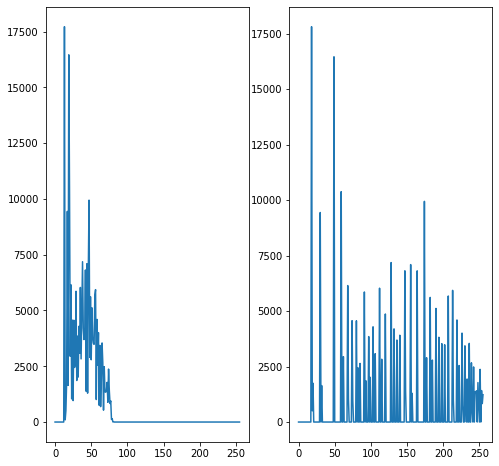

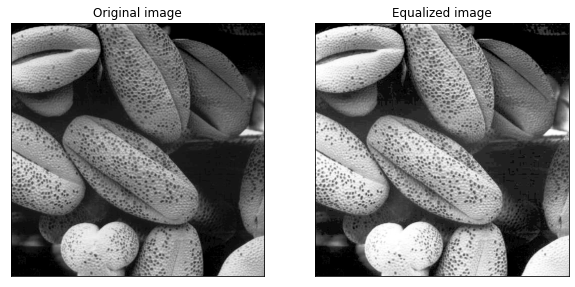

In [34]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE)
assert im is not None
M,N= im.shape
print(int(9.0))
hist_im = cv.calcHist([im], [0], None, [256], [0,256])
cdf_im=np.cumsum(hist_im)
g=cdf_im*255/(M*N)
for i in range(0,len(g)):
    g[i]=int(round(g[i]))
eq_im=cv.LUT(im,g).astype("uint8")
hist_g =cv.calcHist([eq_im],[0],None,[256],[0,256])


fig, ax = plt.subplots(1,2,figsize= (8,8))
ax[0].plot(hist_im)
ax[1].plot(hist_g)
fig,ax = plt.subplots(1,2,figsize = (10,8))

ax[0].imshow(im,"gray")
ax[0].set_title("Original image")

ax[1].imshow(eq_im,"gray")
ax[1].set_title("Equalized image")

for i in range(2):
    ax [i] . set_xticks ([]) , ax [i] . set_yticks ([])

[[78 78 77 ... 50 47 47]
 [78 78 77 ... 50 47 47]
 [80 80 83 ... 51 47 47]
 ...
 [ 1  1  1 ... 26 25 25]
 [ 1  1  1 ... 21 24 24]
 [ 1  1  1 ... 21 24 24]]
[[78 77 71 ... 45 50 47]
 [80 83 73 ... 50 51 47]
 [82 84 78 ... 50 47 49]
 ...
 [ 1  1  0 ... 38 31 25]
 [ 1  1  1 ... 21 26 25]
 [ 1  1  1 ... 20 21 24]]


AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

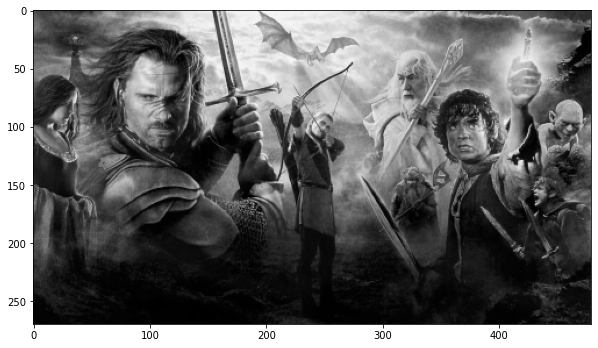

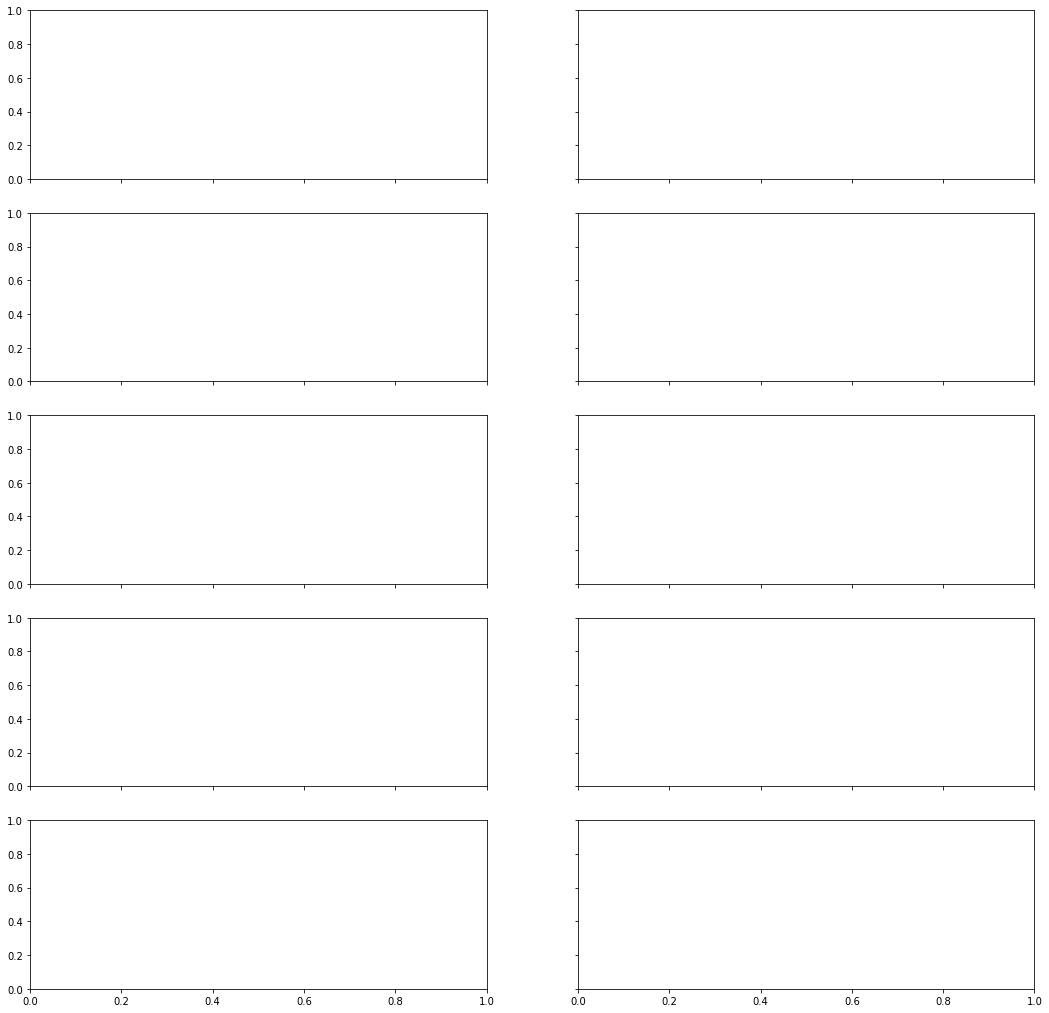

In [47]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'a1q5images/im01small.png',cv.IMREAD_GRAYSCALE)
assert im is not None

fig,ax = plt.subplots(1,1,sharex="all",sharey="all",figsize=(10,10))
ax.imshow(im,cmap="gray",vmin=0,vmax=255)

fig,axes = plt.subplots(5,2,sharex="all",sharey="all",figsize=(18,18))
#scale = [1:10]
for i in range(2,3):
    rows = int(i*im.shape[0])
    columns = int(i*im.shape[1])

    zoomed = np.zeros((rows,columns),dtype=im.dtype)

    for p in range(0,rows):
        for q in range(0,columns):
            try:
                m=round(p/i)
                n=round(q/i)
                if (m>=270):
                    m-=1
                if (n>=480):
                    n-=1
                zoomed[p,q]=im[m,n]
            except IndexError:
                print(int(p/i),int(q/i))
    print(zoomed)
    print(im)
    axes[i].imshow(zoomed.astype("uint8"), cmap="gray",vmin=0, vmax=255)
    axes[i] . set_title( "Original")
    



[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  2. ... -2. -1.  0.]
 [ 0.  0.  0. ... -6. -4. -2.]
 ...
 [ 6.  7.  8. ... -4. -7. -8.]
 [ 2.  3.  4. ... -4. -7. -8.]
 [ 0.  0.  0. ...  0.  0.  0.]]


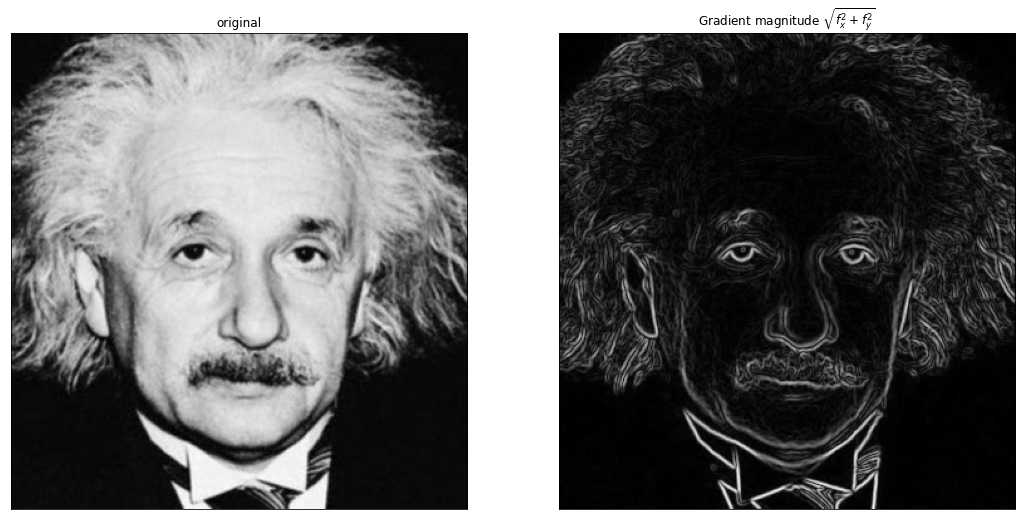

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

ver_kernel = np . array ([[-1,-2,-1 ],[0,0,0],[1,2,1]] , dtype=np.float32)
f_x=cv.filter2D(im,-1,ver_kernel)

print(f_x)
hor_kernel = np . array ([[-1,0,1 ],[-2,0,2],[-1,0,1]] , dtype=np.float32)
f_y=cv.filter2D(im,-1,hor_kernel)

grad_mag=np.sqrt(f_x**2 + f_y**2)

fig,axes = plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray")
axes[0] . set_title( "original")

axes[1] . imshow( grad_mag , cmap= "gray")
axes[1] . set_title( "Gradient magnitude $ \sqrt{f_x^2 + f_y^2}$" )


for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])

(380, 364)
3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'Gradient magnitude $ \\sqrt{f_x^2 + f_y^2}$')

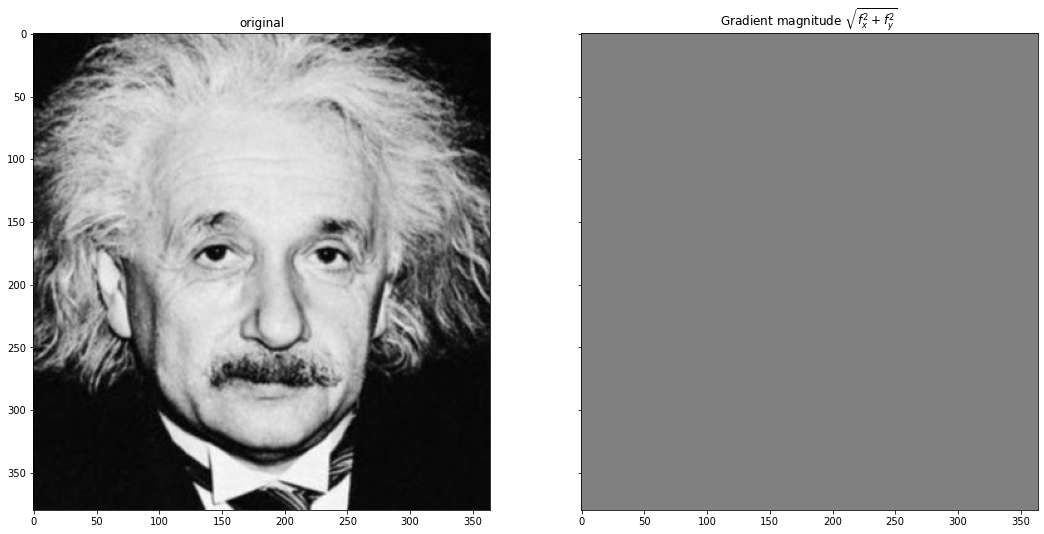

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None
print(im.shape)
result=np.zeros(im.shape,dtype=np.float32)
ver_kernel = np . array ([[-1,-2,-1 ],[0,0,0],[1,2,1]] , dtype=np.float32)

print(len(ver_kernel[0]))

for l in range(im.shape[0]):
    total=0
    for i in range(len(ver_kernel)):
        for m in range(len(ver_kernel[0])):
            total+=ver_kernel[i][m]*im[i][m]
    if (l<=378):
        result[l+1][1] = total
print(result)
fig,axes = plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray")
axes[0] . set_title( "original")

axes[1] . imshow( result , cmap= "gray",vmin=-1020,vmax=1020)
axes[1] . set_title( "Gradient magnitude $ \sqrt{f_x^2 + f_y^2}$" )
     